# VAD

## Setup

In [46]:
%reload_kedro 

2021-08-30 20:43:01,385 - root - INFO - Registered hooks from 2 installed plugin(s): kedro-mlflow-0.7.4
2021-08-30 20:43:01,582 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2021-08-30 20:43:01,601 - kedro.framework.session.session - WARNING - Unable to git describe /Users/steeve_laquitaine/Desktop/vad_ghost
2021-08-30 20:43:01,626 - root - INFO - ** Kedro project vad
2021-08-30 20:43:01,627 - root - INFO - Defined global variable `context`, `session` and `catalog`
2021-08-30 20:43:01,648 - root - INFO - Registered line magic `run_viz`


In [47]:
# Move to project path
import os
os.chdir(context.project_path)

In [48]:
# import dependencies
from pathlib import Path
import os
from kedro.config import ConfigLoader
from kedro.framework.session import KedroSession
from vad.pipelines.data_eng.nodes import Etl
from vad.pipelines.viz.nodes import Viz

/Users/steeve_laquitaine/Desktop/vad_ghost/src/vad/pipelines/data_eng/nodes.py:14: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(conf)


In [49]:
session = KedroSession.create("vad", context.project_path, env="train")

2021-08-30 20:43:01,882 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2021-08-30 20:43:01,897 - kedro.framework.session.session - WARNING - Unable to git describe /Users/steeve_laquitaine/Desktop/vad_ghost
2021-08-30 20:43:01,915 - kedro.config.config - INFO - Config from path `/Users/steeve_laquitaine/Desktop/vad_ghost/conf/train` will override the following existing top-level config keys: disable_existing_loggers, formatters, handlers, loggers, root, version


In [50]:
# create session and train
out = session.run(pipeline_name="data_eng", to_nodes=["sync_audio_and_label"])

2021-08-30 20:43:01,929 - root - INFO - ** Kedro project vad_ghost
2021-08-30 20:43:02,020 - kedro.versioning.journal - WARNING - Unable to git describe /Users/steeve_laquitaine/Desktop/vad_ghost
2021-08-30 20:43:02,049 - kedro.pipeline.node - INFO - Running node: read_audio: read_X(None) -> [audio]
2021-08-30 20:43:02,057 - kedro.io.data_catalog - INFO - Saving data to `audio` (MemoryDataSet)...
2021-08-30 20:43:02,060 - kedro.runner.sequential_runner - INFO - Completed 1 out of 3 tasks
2021-08-30 20:43:02,061 - kedro.io.data_catalog - INFO - Loading data from `params:DATA_ENG` (MemoryDataSet)...
2021-08-30 20:43:02,070 - kedro.pipeline.node - INFO - Running node: load_label: load_Y([params:DATA_ENG]) -> [label]
2021-08-30 20:43:02,085 - kedro.io.data_catalog - INFO - Saving data to `label` (MemoryDataSet)...
2021-08-30 20:43:02,087 - kedro.runner.sequential_runner - INFO - Completed 2 out of 3 tasks
2021-08-30 20:43:02,092 - kedro.io.data_catalog - INFO - Loading data from `audio` (M

/Users/steeve_laquitaine/Desktop/vad_ghost/src/vad/pipelines/train/nodes.py:19: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(conf)
/Applications/anaconda3/envs/test/lib/python3.6/site-packages/kedro/framework/context/context.py:497: UserWarning: Credentials not found in your Kedro project config.
No files found in ['/Users/steeve_laquitaine/Desktop/vad_ghost/conf/base', '/Users/steeve_laquitaine/Desktop/vad_ghost/conf/train'] matching the glob pattern(s): ['credentials*', 'credentials*/**', '**/credentials*']
  warn(f"Credentials not found in your Kedro project config.\n{str(exc)}")


2021-08-30 20:43:02,137 - kedro.io.data_catalog - INFO - Saving data to `synced` (MemoryDataSet)...
2021-08-30 20:43:02,142 - kedro.runner.sequential_runner - INFO - Completed 3 out of 3 tasks
2021-08-30 20:43:02,144 - kedro.runner.sequential_runner - INFO - Pipeline execution completed successfully.
2021-08-30 20:43:02,146 - kedro.io.data_catalog - INFO - Loading data from `synced` (MemoryDataSet)...


In [51]:
# get audio and labels
timestamp = out["synced"]["audio"]["metadata"]["timestamp"]
audio = out["synced"]["audio"]["data"]
labels = out["synced"]["label"]

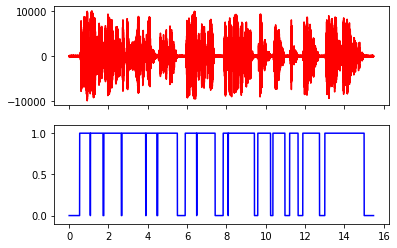

In [52]:
Viz.plot_labelled_audio(timestamp, audio, labels, n_sample=len(audio))